# multi-wayExamples - BSS Example

#### application BSS Signal construction

In [58]:
import numpy as np

t = np.linspace(0,1,101).T  # one source
x = np.array([t, t*2, t*3, t*4]).T  # create 3 sources of multiples of 1, 2, 3, 4
S = np.exp(x) # raise it exponentialy
rng = np.random.default_rng()
M = rng.standard_normal(size=(4,4)) # generate random mixing matrix to record the 4 sources using 3 sensors
X = np.dot(S,M) # mix the four sources

In [59]:
import import_ipynb
from multi_wayExamples_hankel import hankelize
import tensorly as tl

# Separation
H = hankelize(X,Dim=1)
U = tl.tensor(H)
rank = 4

input shape:  (101, 4)
Order:  2
ind:  [51]
N:  101
Dim:  1
Order:  2
ind:  [51]
sizes:  nan
perm_to_first:  1
size_other:  (4,)
size_hankel:  [51 51]
Total required Bytes are:  83232.0
hstruct {'type': 'hankel', 'val': array([[ 2.35122283e+00, -1.19505363e+00, -2.49061892e+00,
        -1.52314866e+00],
       [ 2.42610550e+00, -1.20840718e+00, -2.56296263e+00,
        -1.51935846e+00],
       [ 2.50367796e+00, -1.22176884e+00, -2.63745699e+00,
        -1.51462905e+00],
       [ 2.58404288e+00, -1.23512789e+00, -2.71416731e+00,
        -1.50891340e+00],
       [ 2.66730695e+00, -1.24847292e+00, -2.79316095e+00,
        -1.50216255e+00],
       [ 2.75358110e+00, -1.26179175e+00, -2.87450732e+00,
        -1.49432545e+00],
       [ 2.84298059e+00, -1.27507142e+00, -2.95827803e+00,
        -1.48534895e+00],
       [ 2.93562524e+00, -1.28829811e+00, -3.04454687e+00,
        -1.47517767e+00],
       [ 3.03163960e+00, -1.30145711e+00, -3.13338995e+00,
        -1.46375391e+00],
       [ 3.1311

In [60]:
'''
if alg == 1:
    ## MPS / tensor train
    from tensorly.decomposition import matrix_product_state 
    factors = matrix_product_state(U, rank=rank)
    from tensorly import tt_to_tensor
    S_Hankel = np.round(tt_to_tensor(factors))

elif alg == 2:
    from tensorly.decomposition import tucker
    core, factors = tucker(U, rank=rank)
    from tensorly import tucker_to_tensor
    S_Hankel = tucker_to_tensor(core, factors) # not working

elif alg == 3:
    from tensorly.decomposition import constrained_parafac
    core, factors = constrained_parafac(U, rank=rank, unimodality=True)
    # reconstruct from parafac
    S_Hankel = tl.cp_to_tensor((core, factors))

    from tensorly.decomposition import constrained_parafac
    _, factors = constrained_parafac(U, rank=rank, unimodality=True)
    


else: ## using parafac decomposition
    from tensorly.decomposition import parafac
    factors = parafac(U, rank=rank)
    # reconstruct from parafac
    S_Hankel = tl.cp_to_tensor(factors)
'''

'\nif alg == 1:\n    ## MPS / tensor train\n    from tensorly.decomposition import matrix_product_state \n    factors = matrix_product_state(U, rank=rank)\n    from tensorly import tt_to_tensor\n    S_Hankel = np.round(tt_to_tensor(factors))\n\nelif alg == 2:\n    from tensorly.decomposition import tucker\n    core, factors = tucker(U, rank=rank)\n    from tensorly import tucker_to_tensor\n    S_Hankel = tucker_to_tensor(core, factors) # not working\n\nelif alg == 3:\n    from tensorly.decomposition import constrained_parafac\n    core, factors = constrained_parafac(U, rank=rank, unimodality=True)\n    # reconstruct from parafac\n    S_Hankel = tl.cp_to_tensor((core, factors))\n\n    from tensorly.decomposition import constrained_parafac\n    _, factors = constrained_parafac(U, rank=rank, unimodality=True)\n    \n\n\nelse: ## using parafac decomposition\n    from tensorly.decomposition import parafac\n    factors = parafac(U, rank=rank)\n    # reconstruct from parafac\n    S_Hankel = t

In [61]:
from tensorly.decomposition import parafac # The dense version
_, factors = parafac(U, rank=rank, init='random')
factors

[array([[-3.93010041e+00, -1.25335822e-01, -7.25309411e+00,
          9.42868960e+00],
        [-4.03894006e+00, -8.89462241e-02, -7.48036152e+00,
          9.79284110e+00],
        [-4.15091250e+00, -5.09929164e-02, -7.71401301e+00,
          1.01709256e+01],
        [-4.26610976e+00, -1.14243484e-02, -7.95420775e+00,
          1.05634814e+01],
        [-4.38462659e+00,  2.98125581e-02, -8.20110813e+00,
          1.09710681e+01],
        [-4.50656057e+00,  7.27724501e-02, -8.45487970e+00,
          1.13942670e+01],
        [-4.63201214e+00,  1.17511586e-01, -8.71569125e+00,
          1.18336821e+01],
        [-4.76108477e+00,  1.64087881e-01, -8.98371478e+00,
          1.22899413e+01],
        [-4.89388499e+00,  2.12560949e-01, -9.25912555e+00,
          1.27636968e+01],
        [-5.03052247e+00,  2.62992149e-01, -9.54210209e+00,
          1.32556265e+01],
        [-5.17111019e+00,  3.15444636e-01, -9.83282620e+00,
          1.37664350e+01],
        [-5.31576445e+00,  3.69983403e-01, 

In [62]:
X.shape

(101, 4)

In [63]:
factors = np.array(factors)
factors.shape

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/4075969018.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  factors = np.array(factors)


(3,)

In [64]:
factors[0].shape

(51, 4)

In [65]:
t1 = np.stack((factors[0], factors[1]))
t1 = np.array([t1]) # to be in cpd format as accepted in getstructure function
t1.shape

(1, 2, 51, 4)

In [66]:
from multi_wayExamples_hankel import getstructure

getstructure(t1)

'cpd'

In [67]:
from multi_wayExamples_hankel import dehankelize

Sest = dehankelize(t1) #'Dims'=[1, 1, 1])
Sest

cpd
dims:  [1 2]
rank:  4
order:  2
others:  [0 1]
others:  []
H.shape[1]:  51
H.shape[0]:  2
size_all:  [51 51]
size_hankel:  [51 51]
N:  101


array([[-3.34958963e+00+5.68434189e-14j, -1.54281841e-01+1.42108547e-14j,
         2.03647548e-01+0.00000000e+00j,  2.54812591e+00+5.68434189e-14j],
       [-3.42863912e+00+2.68951528e-14j, -1.32713545e-01-1.20329094e-14j,
         1.92474919e-01+5.57800334e-15j,  2.64701916e+00-2.90184543e-14j],
       [-3.50968534e+00+2.14643118e-14j, -1.10346784e-01-2.34072021e-15j,
         1.80647459e-01-4.08932147e-15j,  2.74971718e+00+4.56671737e-14j],
       [-3.59278123e+00+7.66053887e-15j, -8.71596737e-02+9.61036806e-16j,
         1.68140251e-01-8.32667268e-16j,  2.85636669e+00+5.80646642e-14j],
       [-3.67798111e+00-1.81188398e-14j, -6.31298057e-02-4.81281681e-15j,
         1.54927579e-01-2.68673972e-15j,  2.96712008e+00+5.96855898e-14j],
       [-3.76534086e+00+1.59872116e-14j, -3.82342367e-02-4.62824223e-15j,
         1.40982901e-01-1.71159383e-15j,  3.08213565e+00+4.26325641e-14j],
       [-3.85491784e+00-1.26882631e-14j, -1.24494773e-02+2.71905514e-15j,
         1.26278833e-01-2.283887

In [68]:
S.shape

(101, 4)

In [69]:
Sest.shape

(101, 4)

In [70]:
import math

RMSE_Han = math.sqrt(np.square(np.subtract(S,Sest)).mean() )
RMSE_Han

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/3327394433.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Han = math.sqrt(np.square(np.subtract(S,Sest)).mean() )


16.220415816970597

In [71]:
#RMSE_Hankel = math.sqrt(np.square(np.subtract(S,Sest)).mean() )
RMSE_Hankel1 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,0])).mean() ) # the factor that we identified with the first source
print ("RMSE_Hankel1: ", RMSE_Hankel1)
RMSE_Hankel2 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,1])).mean() ) # with the second source
print ("RMSE_Hankel2: ", RMSE_Hankel2)
RMSE_Hankel3 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,2])).mean() ) # with the third source
print ("RMSE_Hankel3: ", RMSE_Hankel3)
RMSE_Hankel4 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,3])).mean() ) # with the third source
print ("RMSE_Hankel4: ", RMSE_Hankel4)
RMSE_Han_1 = RMSE_Hankel1 + RMSE_Hankel2 + RMSE_Hankel3 + RMSE_Hankel4
print ("RMSE_Han_1: ", RMSE_Han_1)

RMSE_Hankel1:  19.05894049415937
RMSE_Hankel2:  0.9631300462787733
RMSE_Hankel3:  14.155923269225383
RMSE_Hankel4:  22.087248838449085
RMSE_Han_1:  56.26524264811261


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/3615685899.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel1 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,0])).mean() ) # the factor that we identified with the first source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/3615685899.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel2 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,1])).mean() ) # with the second source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/3615685899.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel3 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,2])).mean() ) # with the third source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/3615685899.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel4 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,3])).mean() ) # with th

In [72]:
# trying if different arrangment of sources could minimise the total error, but the first arrangement is the best
RMSE_Hankel12 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,1])).mean() ) # the factor that we identified with the first source
print ("RMSE_Hankel12: ", RMSE_Hankel12)
RMSE_Hankel23 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,2])).mean() ) # with the second source
print ("RMSE_Hankel23: ", RMSE_Hankel23)
RMSE_Hankel34 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,3])).mean() ) # with the third source
print ("RMSE_Hankel34: ", RMSE_Hankel34)
RMSE_Hankel41 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,0])).mean() ) # with the third source
print ("RMSE_Hankel41: ", RMSE_Hankel41)
RMSE_Han_2 = RMSE_Hankel12 + RMSE_Hankel23 + RMSE_Hankel34 + RMSE_Hankel41
print ("RMSE_Han_2: ", RMSE_Han_2)

RMSE_Hankel12:  2.6783118401097625
RMSE_Hankel23:  9.471551513098747
RMSE_Hankel34:  33.45936181126215
RMSE_Hankel41:  36.70377629268596
RMSE_Han_2:  82.31300145715662


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/1218245536.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel12 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,1])).mean() ) # the factor that we identified with the first source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/1218245536.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel23 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,2])).mean() ) # with the second source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/1218245536.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel34 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,3])).mean() ) # with the third source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/1218245536.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel41 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,0])).mean() ) # wit

In [73]:
RMSE_Hankel13 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,2])).mean() ) # the factor that we identified with the first source
print ("RMSE_Hankel13: ", RMSE_Hankel13)
RMSE_Hankel24 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,3])).mean() ) # with the second source
print ("RMSE_Hankel24: ", RMSE_Hankel24)
RMSE_Hankel31 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,0])).mean() ) # with the third source
print ("RMSE_Hankel31: ", RMSE_Hankel31)
RMSE_Hankel42 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,1])).mean() ) # with the third source
print ("RMSE_Hankel42: ", RMSE_Hankel42)
RMSE_Han_3 = RMSE_Hankel13 + RMSE_Hankel24 + RMSE_Hankel31 + RMSE_Hankel42
print ("RMSE_Han_3: ", RMSE_Han_3)

RMSE_Hankel13:  7.489901046738949
RMSE_Hankel24:  38.15828758710353
RMSE_Hankel31:  25.604399808011955
RMSE_Hankel42:  15.490034106588837
RMSE_Han_3:  86.74262254844328


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/2212018864.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel13 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,2])).mean() ) # the factor that we identified with the first source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/2212018864.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel24 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,3])).mean() ) # with the second source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/2212018864.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel31 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,0])).mean() ) # with the third source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/2212018864.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel42 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,1])).mean() ) # wit

In [74]:
RMSE_Hankel14 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,3])).mean() ) # the factor that we identified with the first source
print ("RMSE_Hankel14: ", RMSE_Hankel14)
RMSE_Hankel21 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,0])).mean() ) # with the second source
print ("RMSE_Hankel21: ", RMSE_Hankel21)
RMSE_Hankel32 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,1])).mean() ) # with the third source
print ("RMSE_Hankel32: ", RMSE_Hankel32)
RMSE_Hankel43 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,2])).mean() ) # with the third source
print ("RMSE_Hankel43: ", RMSE_Hankel43)
RMSE_Han_4 = RMSE_Hankel14 + RMSE_Hankel21 + RMSE_Hankel32 + RMSE_Hankel43
print ("RMSE_Han_4: ", RMSE_Han_4)

RMSE_Hankel14:  40.12450480540415
RMSE_Hankel21:  21.02249416149183
RMSE_Hankel32:  4.124082418133137
RMSE_Hankel43:  25.51958673263679
RMSE_Han_4:  90.79066811766592


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/925276150.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel14 = math.sqrt(np.square(np.subtract(S[:,0],Sest[:,3])).mean() ) # the factor that we identified with the first source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/925276150.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel21 = math.sqrt(np.square(np.subtract(S[:,1],Sest[:,0])).mean() ) # with the second source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/925276150.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel32 = math.sqrt(np.square(np.subtract(S[:,2],Sest[:,1])).mean() ) # with the third source
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/925276150.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  RMSE_Hankel43 = math.sqrt(np.square(np.subtract(S[:,3],Sest[:,2])).mean() ) # with th

In [75]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py

from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=4, whiten="arbitrary-variance")
S_ICA = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_ICA, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=4)
S_PCA = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

In [77]:
import math

# Error calculation
RMSE_ICA = math.sqrt(np.square(np.subtract(S,S_ICA)).mean() )
RMSE_PCA = math.sqrt(np.square(np.subtract(S,S_PCA)).mean() )
print ("RMSE_ICA: ", RMSE_ICA)
print ("RMSE_PCA: ", RMSE_PCA)
assert np.allclose(X, np.dot(S_ICA, A_.T) + ica.mean_)

RMSE_ICA:  10.843342829827284
RMSE_PCA:  16.88659230887574


In [79]:
## you can check and compare the following
ica.mean_
A_.shape
#assert np.allclose(M, A_)
M # original mixing matrix
A_ # estimated mixing matrix
S_ICA.shape
S_PCA.shape

(101, 4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

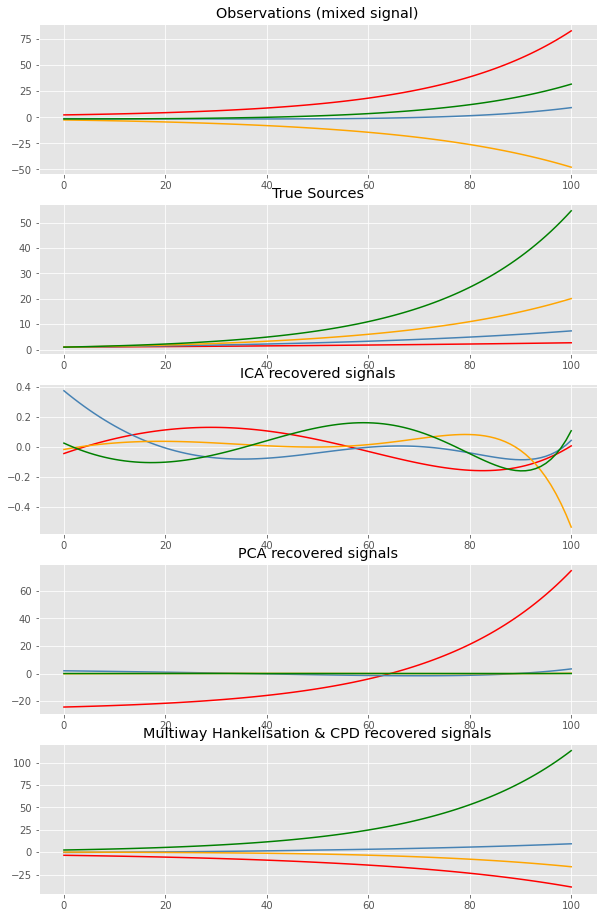

In [80]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_ICA, S_PCA, Sest]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
    "Multiway Hankelisation & CPD recovered signals",
]
colors = ["red", "steelblue", "orange", "green"]
plt.figure(figsize=(10,16))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(5, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

#plt.tight_layout()
plt.show()

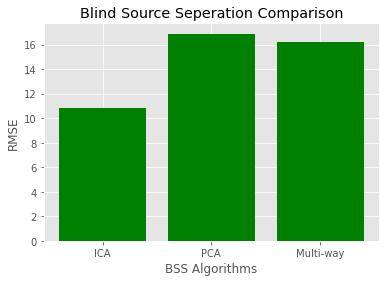

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

#fig = plt.figure( figsize=(12,6))
plt.style.use('ggplot')

x = ['ICA', 'PCA', 'Multi-way']
MSE = [RMSE_ICA, RMSE_PCA, RMSE_Han]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, MSE, color='green')
plt.xlabel("BSS Algorithms")
plt.ylabel("RMSE")
plt.title("Blind Source Seperation Comparison")

plt.xticks(x_pos, x)

plt.show()

#### ANother real example from chapter 2 that requires huge memory

Sampling rate =  8000
Data type is  uint8
Number of samples:  50000


Text(0.5, 1.0, 'Whitened data')

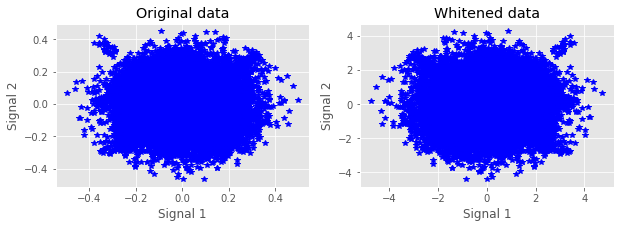

In [105]:
from scipy import linalg as LA

def whitenData (x):
    # Calculate the covariance matrix of the initial data.
    cov = np.cov(x)
    # Calculate eigenvalues and eigenvectors of the covariance matrix.
    d, E = LA.eigh(cov)
    # Generate a diagonal matrix with the eigenvalues as diagonal elements.
    D = np.diag(d)
    # Calculate the singular values as square root of eigenvalues
    Di = LA.sqrtm(LA.inv(D))
    # Perform whitening. xn is the whitened matrix.
    xn = np.dot(Di, np.dot(np.transpose(E), x))
    return xn
from scipy.io import wavfile

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('../ch2/data/mix1.wav')
print ("Sampling rate = ", samplingRate)
print ("Data type is ", signal1.dtype)
# Convert the signal so that amplitude lies between 0 and 1.
signal1 = signal1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# Output information about the sound samples.
a = signal1.shape
n = a[0]
print ("Number of samples: ", n)
n = n * 1.0
# Input data from the first receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('../ch2/data/mix2.wav')
signal2 = signal2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# x is our initial data matrix.
x = [signal1, signal2]

# Plot the signals from both sources to show correlations in the data.
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Original data")
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')

X = whitenData (x)

# Plot whitened data to show new structure of the data.
plt.subplot(1,2,2)
plt.plot(X[0], X[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

In [106]:
X.shape

(2, 50000)

In [121]:
rank = 2
from tensorly.decomposition import constrained_parafac

_, factors = constrained_parafac(X, rank=rank, init='random') # , unimodality=True)
factors

[array([[ 0.00529485,  0.03186782],
        [-0.01693634,  0.00375662]]),
 array([[-143.85141887,   94.48482429],
        [-115.08502352,   74.5330323 ],
        [ -57.07129874,   36.8962369 ],
        ...,
        [ -12.29968567,   -0.91967714],
        [ -38.10576375,   -8.4253734 ],
        [  57.86058058,   39.20324439]])]

In [122]:
# these are not updated with the new example, and is reading from the first toy example
factors = np.array(factors)
factors.shape

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_18688/160209265.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  factors = np.array(factors)


(2,)

In [123]:
factors[0].shape

(2, 2)